In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")




c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# S&P 500 descriptive statistics

In [ ]:

SPX_data = pd.read_csv('C:/Users/User/Desktop/Data speciale/SPX_indicies_data.csv', parse_dates = True, index_col = 'date')
SPX_data.index = pd.to_datetime(SPX_data.index)
SPX_data = SPX_data[SPX_data.index >= '2010-01-01']

SPX_data = pd.DataFrame(SPX_data['close'])
SPX_data['return'] = SPX_data['close'].pct_change()
SPX_data.dropna(inplace = True)

# plot the data
plt.figure(figsize=(10, 6))
plt.plot(SPX_data['return'])
plt.ylabel('Returns')
plt.title('S&P 500 daily returns')
plt.legend(['Returns'])
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(SPX_data['close']) 
plt.ylabel('$S_t$')
plt.title('S&P 500 daily closing price')
plt.show()

# Risk free rate

In [ ]:
# 3M US Treasury Bill rate (r)
interst_rates = pd.read_csv('C:/Users/User/Desktop/Data speciale/3M_US_yield_data.csv', parse_dates=True, index_col='DATE', na_values='.')
interst_rates = pd.DataFrame(interst_rates['DTB3'])    
interst_rates.dropna(inplace=True)
interst_rates['rate'] = interst_rates['DTB3']/100
del(interst_rates['DTB3'])

# plot the interest rates
plt.figure(figsize=(10, 6))
plt.plot(interst_rates['rate'], color='black')
plt.ylabel('Yield')
plt.title('3M US Treasury Bill rates')
plt.show()

# Desriptive statistics on the options data

In [2]:

# import data
options_data = pd.read_csv('C:/Users/User/Desktop/Data speciale/NeuralNet_data_v2.csv', parse_dates= True, index_col=0)

options_data.dropna(inplace=True)



In [3]:

options_data['price'] = options_data['Option Price (C)'] * options_data['Strike (K)']

options_data.head()

,Stock (S),Strike (K),Moneyness (M),Time to maturity (T),Risk free rate (r),BS (vol10),BS (vol30),BS (vol60),BS GARCH,BS VIX,...,vol60,GARCH,VIX,Option Price (C),ID,Year,tchi,shtint,gdpce,price
2010-01-04,1132.99,1100.0,1.029991,0.010959,0.0008,3.002031e-02,3.006473e-02,0.030254,3.000093e-02,0.030765,...,0.158795,0.086052,0.2004,0.030273,46405649,2010,1.070281,0.904721,-0.000836,33.300
2010-01-04,1132.99,1150.0,0.985209,0.010959,0.0008,5.461026e-04,8.904219e-04,0.001670,1.830931e-04,0.002925,...,0.158795,0.086052,0.2004,0.001348,46014255,2010,1.070281,0.904721,-0.000836,1.550
2010-01-04,1132.99,1200.0,0.944158,0.010959,0.0008,8.148158e-10,2.470721e-08,0.000001,1.179291e-13,0.000019,...,0.158795,0.086052,0.2004,0.000104,46829953,2010,1.070281,0.904721,-0.000836,0.125
2010-01-04,1132.99,1125.0,1.007102,0.010959,0.0008,9.047122e-03,9.650321e-03,0.010806,8.223606e-03,0.012429,...,0.158795,0.086052,0.2004,0.010622,46343648,2010,1.070281,0.904721,-0.000836,11.950
2010-01-04,1132.99,1175.0,0.964247,0.010959,0.0008,2.713361e-06,1.313734e-05,0.000082,5.275442e-08,0.000346,...,0.158795,0.086052,0.2004,0.000149,45734175,2010,1.070281,0.904721,-0.000836,0.175


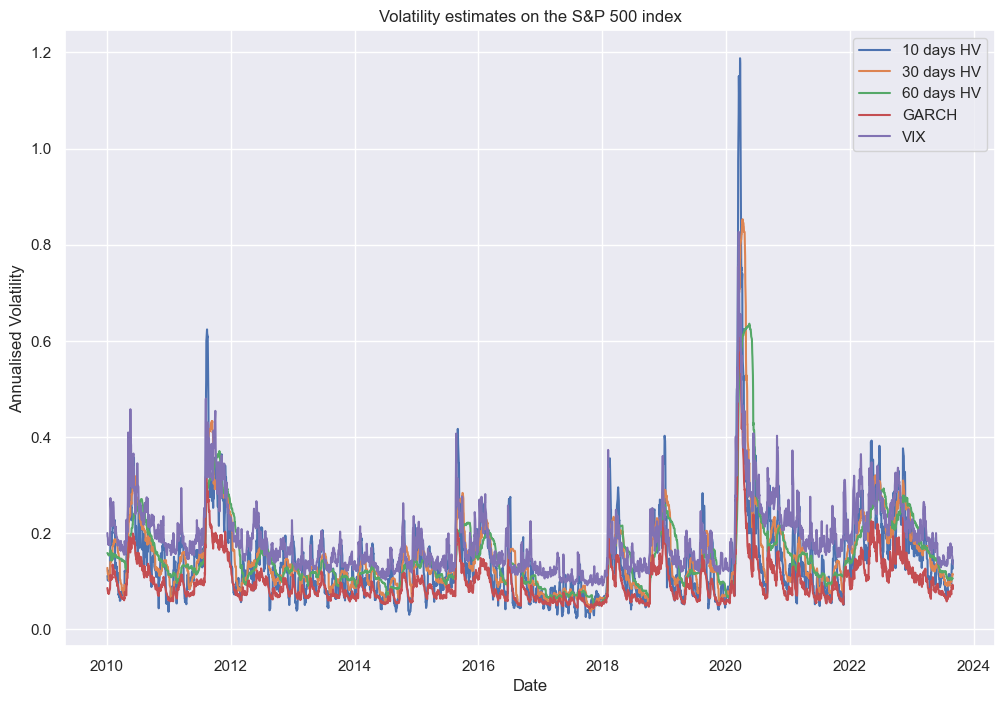

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(options_data['vol10'], label = '10 days HV')
plt.plot(options_data['vol30'], label = '30 days HV')
plt.plot(options_data['vol60'], label = '60 days HV')
plt.plot(options_data['GARCH'], label = 'GARCH')
plt.plot(options_data['VIX'], label = 'VIX')
plt.xlabel('Date')
plt.ylabel('Annualised Volatility')
plt.title('Volatility estimates on the S&P 500 index')
plt.legend()
plt.show()

# save the plot as a pdf file
plt.savefig('C:/Users/User/Documents/GitHub/Master-Thesis/Figures/volatility_forecast.pdf', format='pdf')

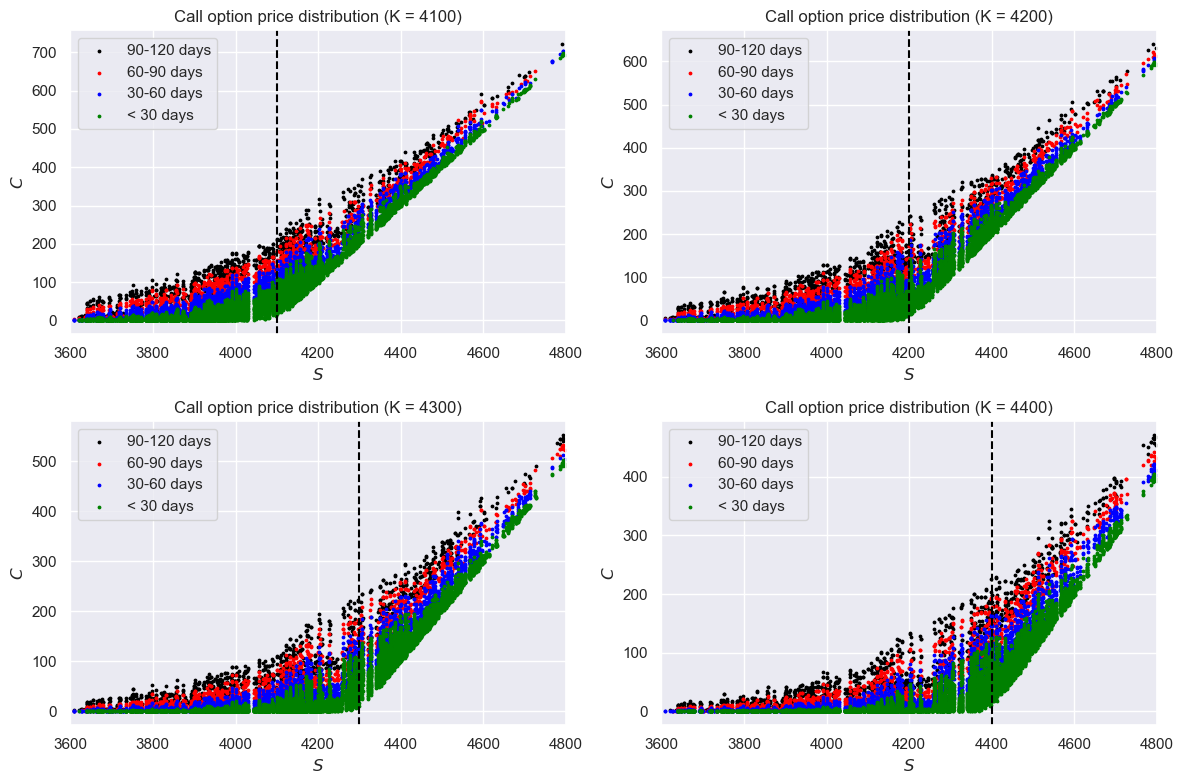

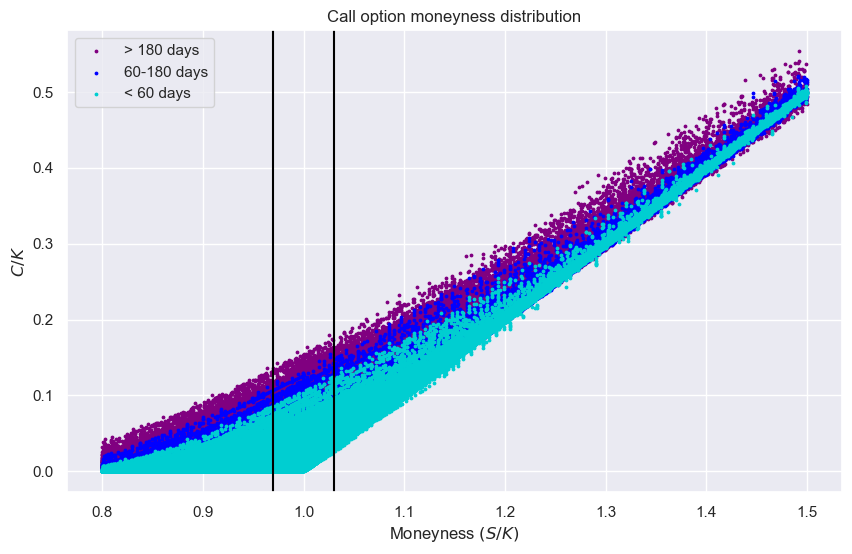

In [4]:

# count the number of observations for each strike price
strike_counts = options_data['Strike (K)'].value_counts().sort_index()

# sort by maturity

def plot_call_prices(strike, data, ax):
    data = data[data['Strike (K)'] == strike]
    data = data.sort_index()

    shortmaturity1 = (data['Time to maturity (T)'] * 365 < 150) & (data['Time to maturity (T)'] * 365 > 120)
    shortmaturity2 = (data['Time to maturity (T)'] * 365 < 120) & (data['Time to maturity (T)'] * 365 > 90)
    shortmaturity3 = (data['Time to maturity (T)'] * 365 < 90) & (data['Time to maturity (T)'] * 365 > 60)
    shortmaturity4 = (data['Time to maturity (T)'] * 365 < 60) & (data['Time to maturity (T)'] * 365 > 30)
    shortmaturity5 = (data['Time to maturity (T)'] * 365 < 30)
    # make a scatter plot of the call prices and the stock prices
    
    # plt.scatter(data[shortmaturity1]['Stock (S)'], data[shortmaturity1]['price'], color='red', s=10)
    ax.scatter(data[shortmaturity2]['Stock (S)'], data[shortmaturity2]['price'], color='black', s=3)
    ax.scatter(data[shortmaturity3]['Stock (S)'], data[shortmaturity3]['price'], color='red', s=3)
    ax.scatter(data[shortmaturity4]['Stock (S)'], data[shortmaturity4]['price'], color='blue', s=3)
    ax.scatter(data[shortmaturity5]['Stock (S)'], data[shortmaturity5]['price'], color='green', s=3)
    # set vertical line at the strike price
    ax.axvline(x=strike, color='black', linestyle='--')
    ax.set_ylabel('$C$')
    ax.set_xlabel('$S$')
    ax.set_title(f'Call option price distribution (K = {strike})')
    # limit the x-axis to make the plot more readable
    ax.set_xlim(3600, 4800)
    # add vertical lines to show the strike price
    #plt.axvline(x=strike, color='black', linestyle='--')
    ax.legend(['90-120 days', '60-90 days', '30-60 days', '< 30 days'], loc='upper left')
    

# make a plot with 4 subplots in the same plot for different strike prices [4100, 4200, 4300, 4400] make sure it's in the same plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

plot_call_prices(4100, options_data, axs[0, 0])
plot_call_prices(4200, options_data, axs[0, 1])
plot_call_prices(4300, options_data, axs[1, 0])
plot_call_prices(4400, options_data, axs[1, 1])
fig.tight_layout()


def plot_moneyness(data):

    moneyness1 = data['Moneyness (M)'] < 0.97
    moneyness2 = (data['Moneyness (M)'] <= 1.03) & (data['Moneyness (M)'] >= 0.97)
    moneyness3 = data['Moneyness (M)'] > 1.03

    maturity1 = data['Time to maturity (T)'] * 365 >= 180
    maturity2 = (data['Time to maturity (T)'] * 365 < 180) & (data['Time to maturity (T)'] * 365 >= 60)
    maturity3 = data['Time to maturity (T)'] * 365 < 60

    # plot the call prices for different moneyness levels
    plt.figure(figsize=(10, 6))
    plt.scatter(data[maturity1]['Moneyness (M)'], data[maturity1]['Option Price (C)'], color='purple', s=3)
    plt.scatter(data[maturity2]['Moneyness (M)'], data[maturity2]['Option Price (C)'], color='blue', s=3)
    plt.scatter(data[maturity3]['Moneyness (M)'], data[maturity3]['Option Price (C)'], color='darkturquoise', s=3)
    plt.ylabel('$C/K$')
    plt.xlabel('Moneyness $(S/K)$')
    plt.title('Call option moneyness distribution')
    # add vertical lines to show at moneyness level 1 and 1.03
    plt.axvline(x=0.97, color='black', linestyle='-')
    plt.axvline(x=1.03, color='black', linestyle='-')
    plt.legend(['> 180 days', '60-180 days', '< 60 days'], loc='upper left')
    plt.show()

plot_moneyness(options_data)





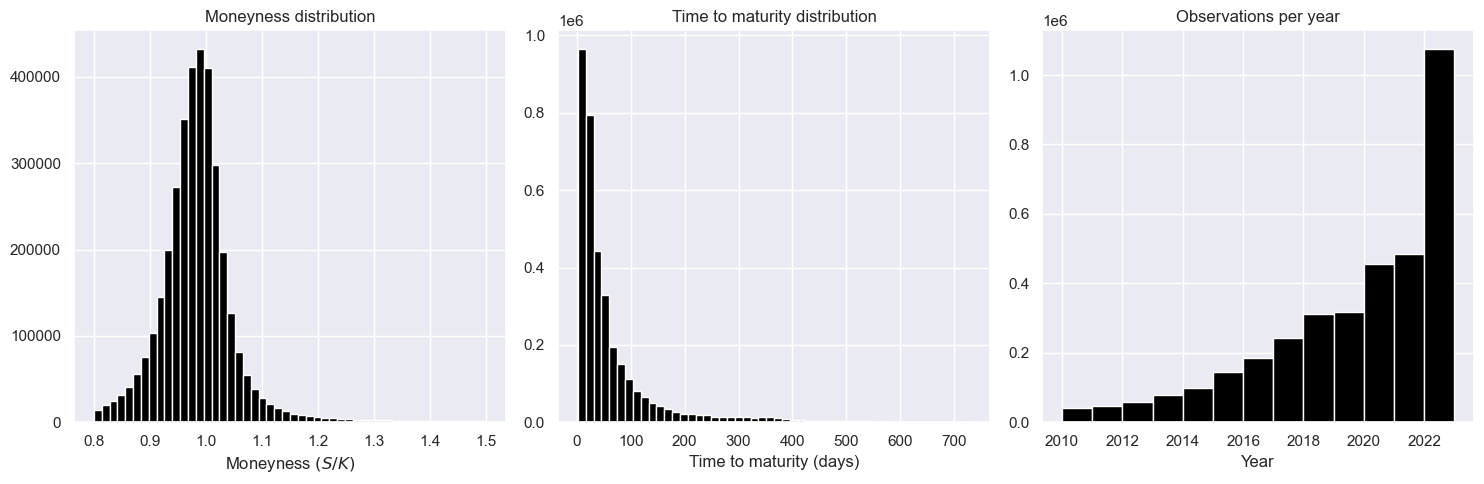

In [57]:
# make a plot with 3 subplots next to eachother where in a histogram one for moneyness one for time to maturity and one for the volume each year

def plot_histograms(data):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # plot the moneyness histogram
    axs[0].hist(data['Moneyness (M)'], bins=50, color='black')
    axs[0].set_title('Moneyness distribution')
    axs[0].set_xlabel('Moneyness $(S/K)$')
    # plot the time to maturity histogram
    axs[1].hist(data['Time to maturity (T)'] * 365, bins=50, color='black')
    axs[1].set_title('Time to maturity distribution')
    axs[1].set_xlabel('Time to maturity (days)')
    # plot the volume column grouped by year
    data['year'] = data.index.year
    data['year'].hist(ax=axs[2], bins=13, color='black')
    axs[2].set_title('Observations per year')
    axs[2].set_xlabel('Year')
    fig.tight_layout()
    plt.show()

plot_histograms(options_data)

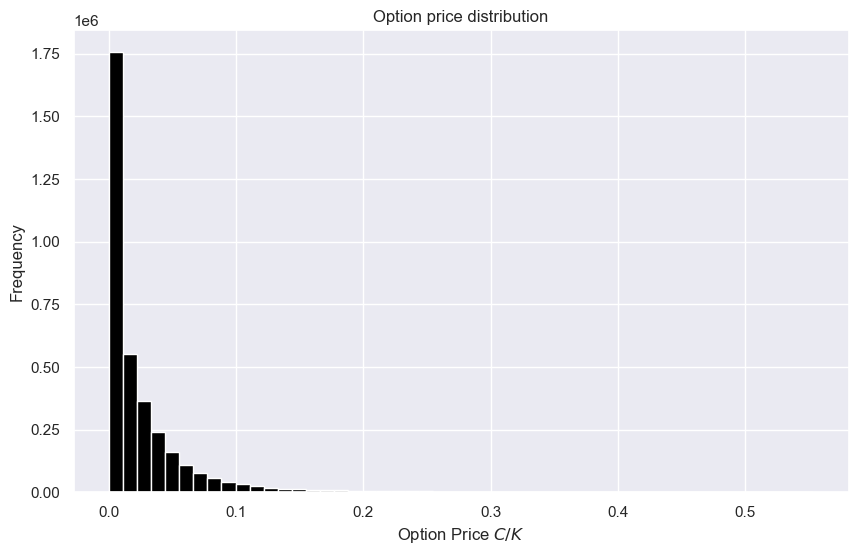

In [9]:
# plot the price of the options in a histogram
plt.figure(figsize=(10, 6))
plt.hist(options_data['Option Price (C)'], bins=50, color='black')
plt.title('Option price distribution')
plt.xlabel('Option Price $C/K$')
plt.ylabel('Frequency')
plt.show()

# Additional Macrofinance Variables

C:\Users\User\AppData\Local\Temp\ipykernel_57148\4172919736.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  goyal = pd.read_csv('C:/Users/User/Desktop/Data speciale/Goyal_macrovariables.csv', parse_dates=True, index_col='date')
C:\Users\User\AppData\Local\Temp\ipykernel_57148\4172919736.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  goyal_daily['gdpce'] = goyal_daily['gdpce'].fillna(method='bfill')


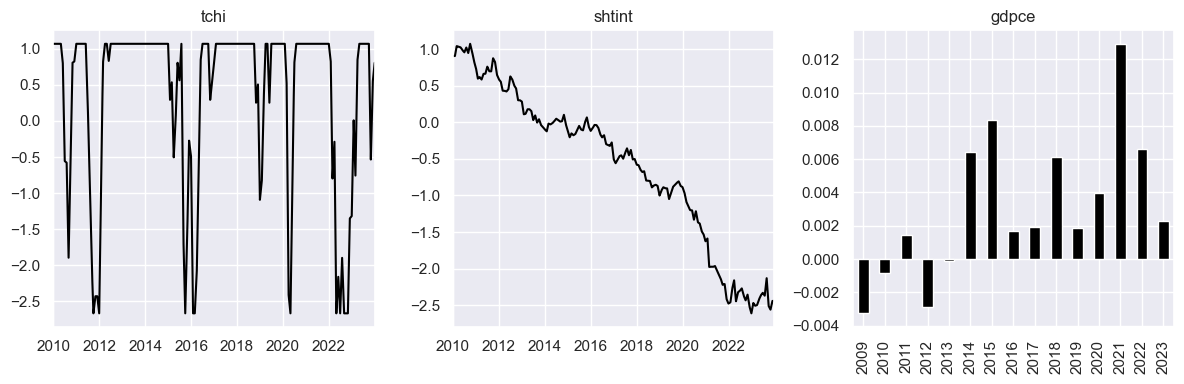

In [10]:

# Load the dataset
goyal = pd.read_csv('C:/Users/User/Desktop/Data speciale/Goyal_macrovariables.csv', parse_dates=True, index_col='date')

# Ensure the index is in datetime format (assuming date format is 'YYYYMM')
goyal.index = pd.to_datetime(goyal.index, format='%Y%m')

# Set the index to the last day of the month
goyal.index = goyal.index + pd.offsets.MonthEnd(0)

# Create a new daily date range covering the full period of the dataset
daily_index = pd.date_range(start=goyal.index.min(), end=goyal.index.max(), freq='D')

# Reindex the dataset to the new daily frequency
goyal_daily = goyal.reindex(daily_index)

# Linearly interpolate the 'tchi' and 'shtint' columns to fill in the daily data
goyal_daily['tchi'] = goyal_daily['tchi'].interpolate(method='linear')
goyal_daily['shtint'] = goyal_daily['shtint'].interpolate(method='linear')

# For 'gdpce', fill each daily value with the corresponding end-of-month value for that month
goyal_daily['gdpce'] = goyal_daily['gdpce'].fillna(method='bfill')


# plot the data in a figure with 3 subplots. The tchi and shtint should be line plots. While the gdpce should be a bar plot, where there is a bar for each year.
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
goyal_daily['tchi'].plot(ax=axs[0], color='black')
axs[0].set_title('tchi')
goyal_daily['shtint'].plot(ax=axs[1], color='black')
axs[1].set_title('shtint')
goyal_daily['gdpce'].groupby(goyal_daily.index.year).mean().plot(kind='bar', ax=axs[2], color='black')
axs[2].set_title('gdpce')

fig.tight_layout()
plt.show()

